### Introduction

I am attempting to use a relatively simple set of equations to describe the model shown below. This model attempts to describe the line of sight between an observer and a target with given elevations across a known distance on a spherical Earth. The specific instance I am modeling is the line of sight between the top of Blood Mountain and Atlanta, GA.

The following equations are used to define the model:

$$
\begin{align}
d = r\theta \\
a^2 = (r + h_1)^2 + (r + h_2)^2 - 2(r + h_1)(r + h_2)\cos(\theta) \\
(r + h_1)^2 = a_1^2 + (r + x)^2 \\
(r + h_2)^2 = a_2^2 + (r + x)^2 \\
a = a_1 + a_2 \\
\end{align}
$$

Equation (1) is a simple arc length formula formed by the assumed spherical surface of the Earth. Equation (2) is the law of cosines applied to the triangle formed by the observer, the target, and the center of the Earth. Equations (3) and (4) are the Pythagorean theorem applied to the right triangles formed by the line of sight and the center of the Earth. Equation (5) is the sum of the two distances: (1) from the observer to the point where the line of sight is closest to the Earth and (2) that same point to the target of observation.


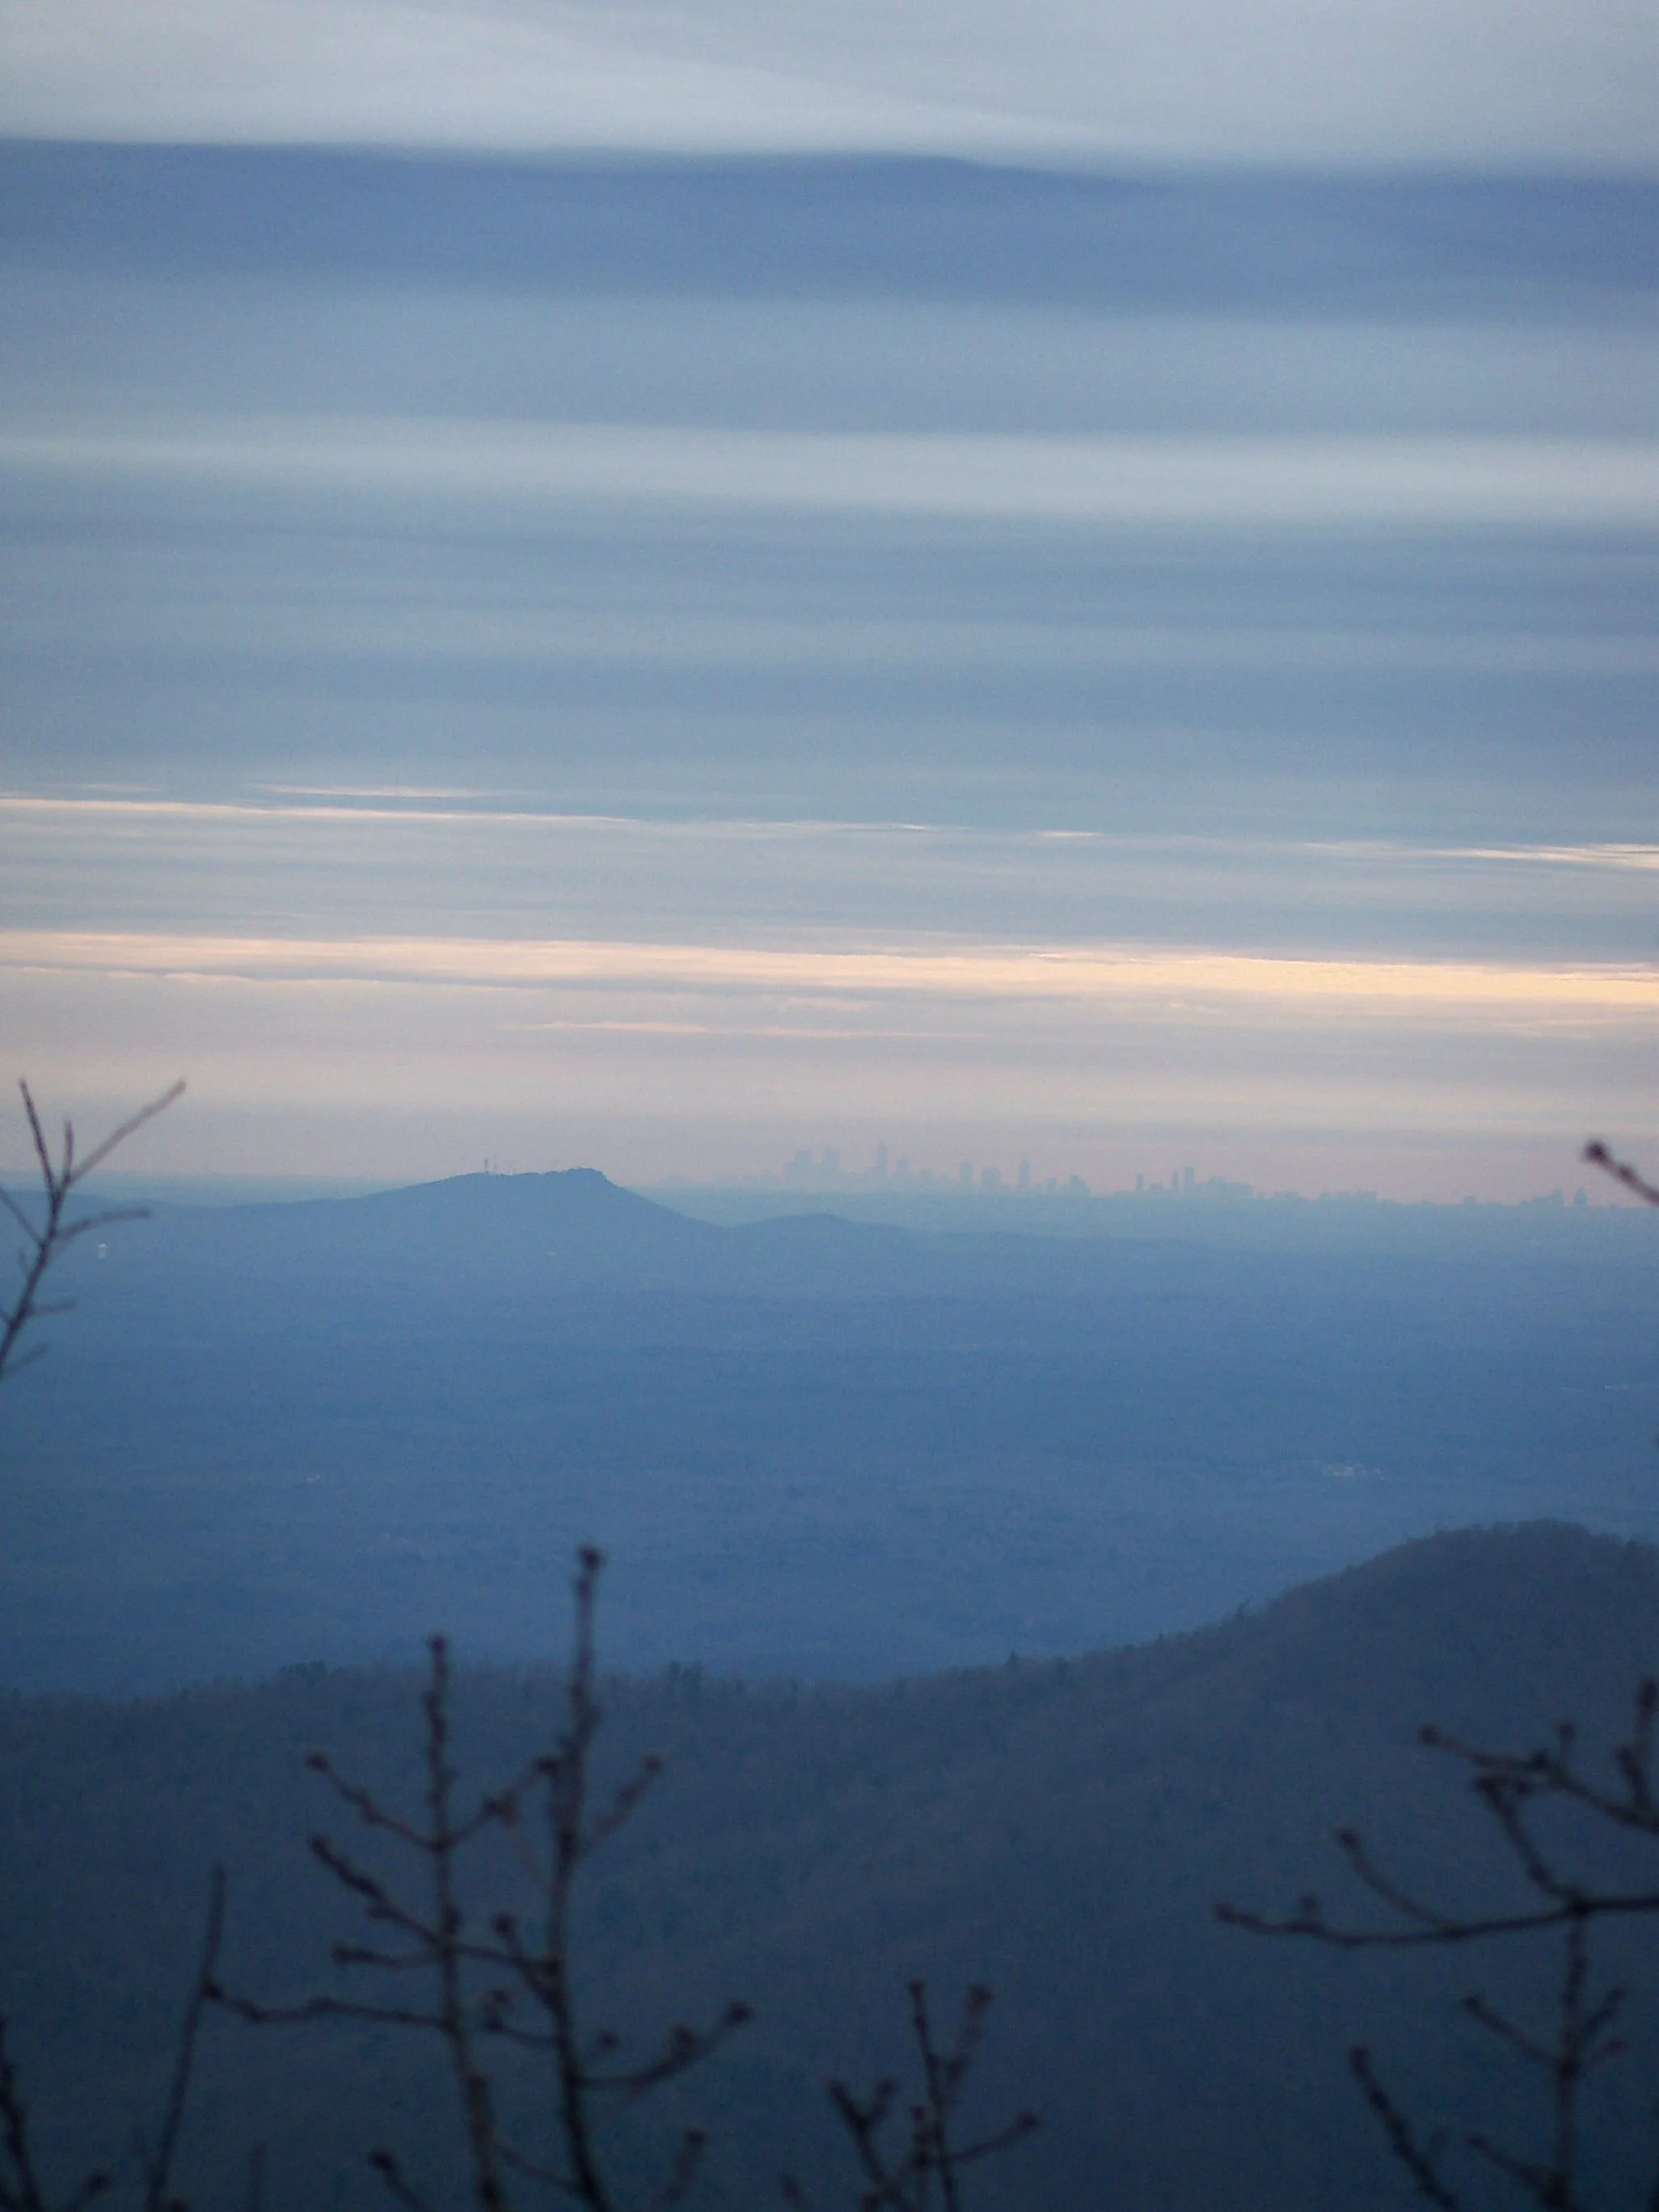

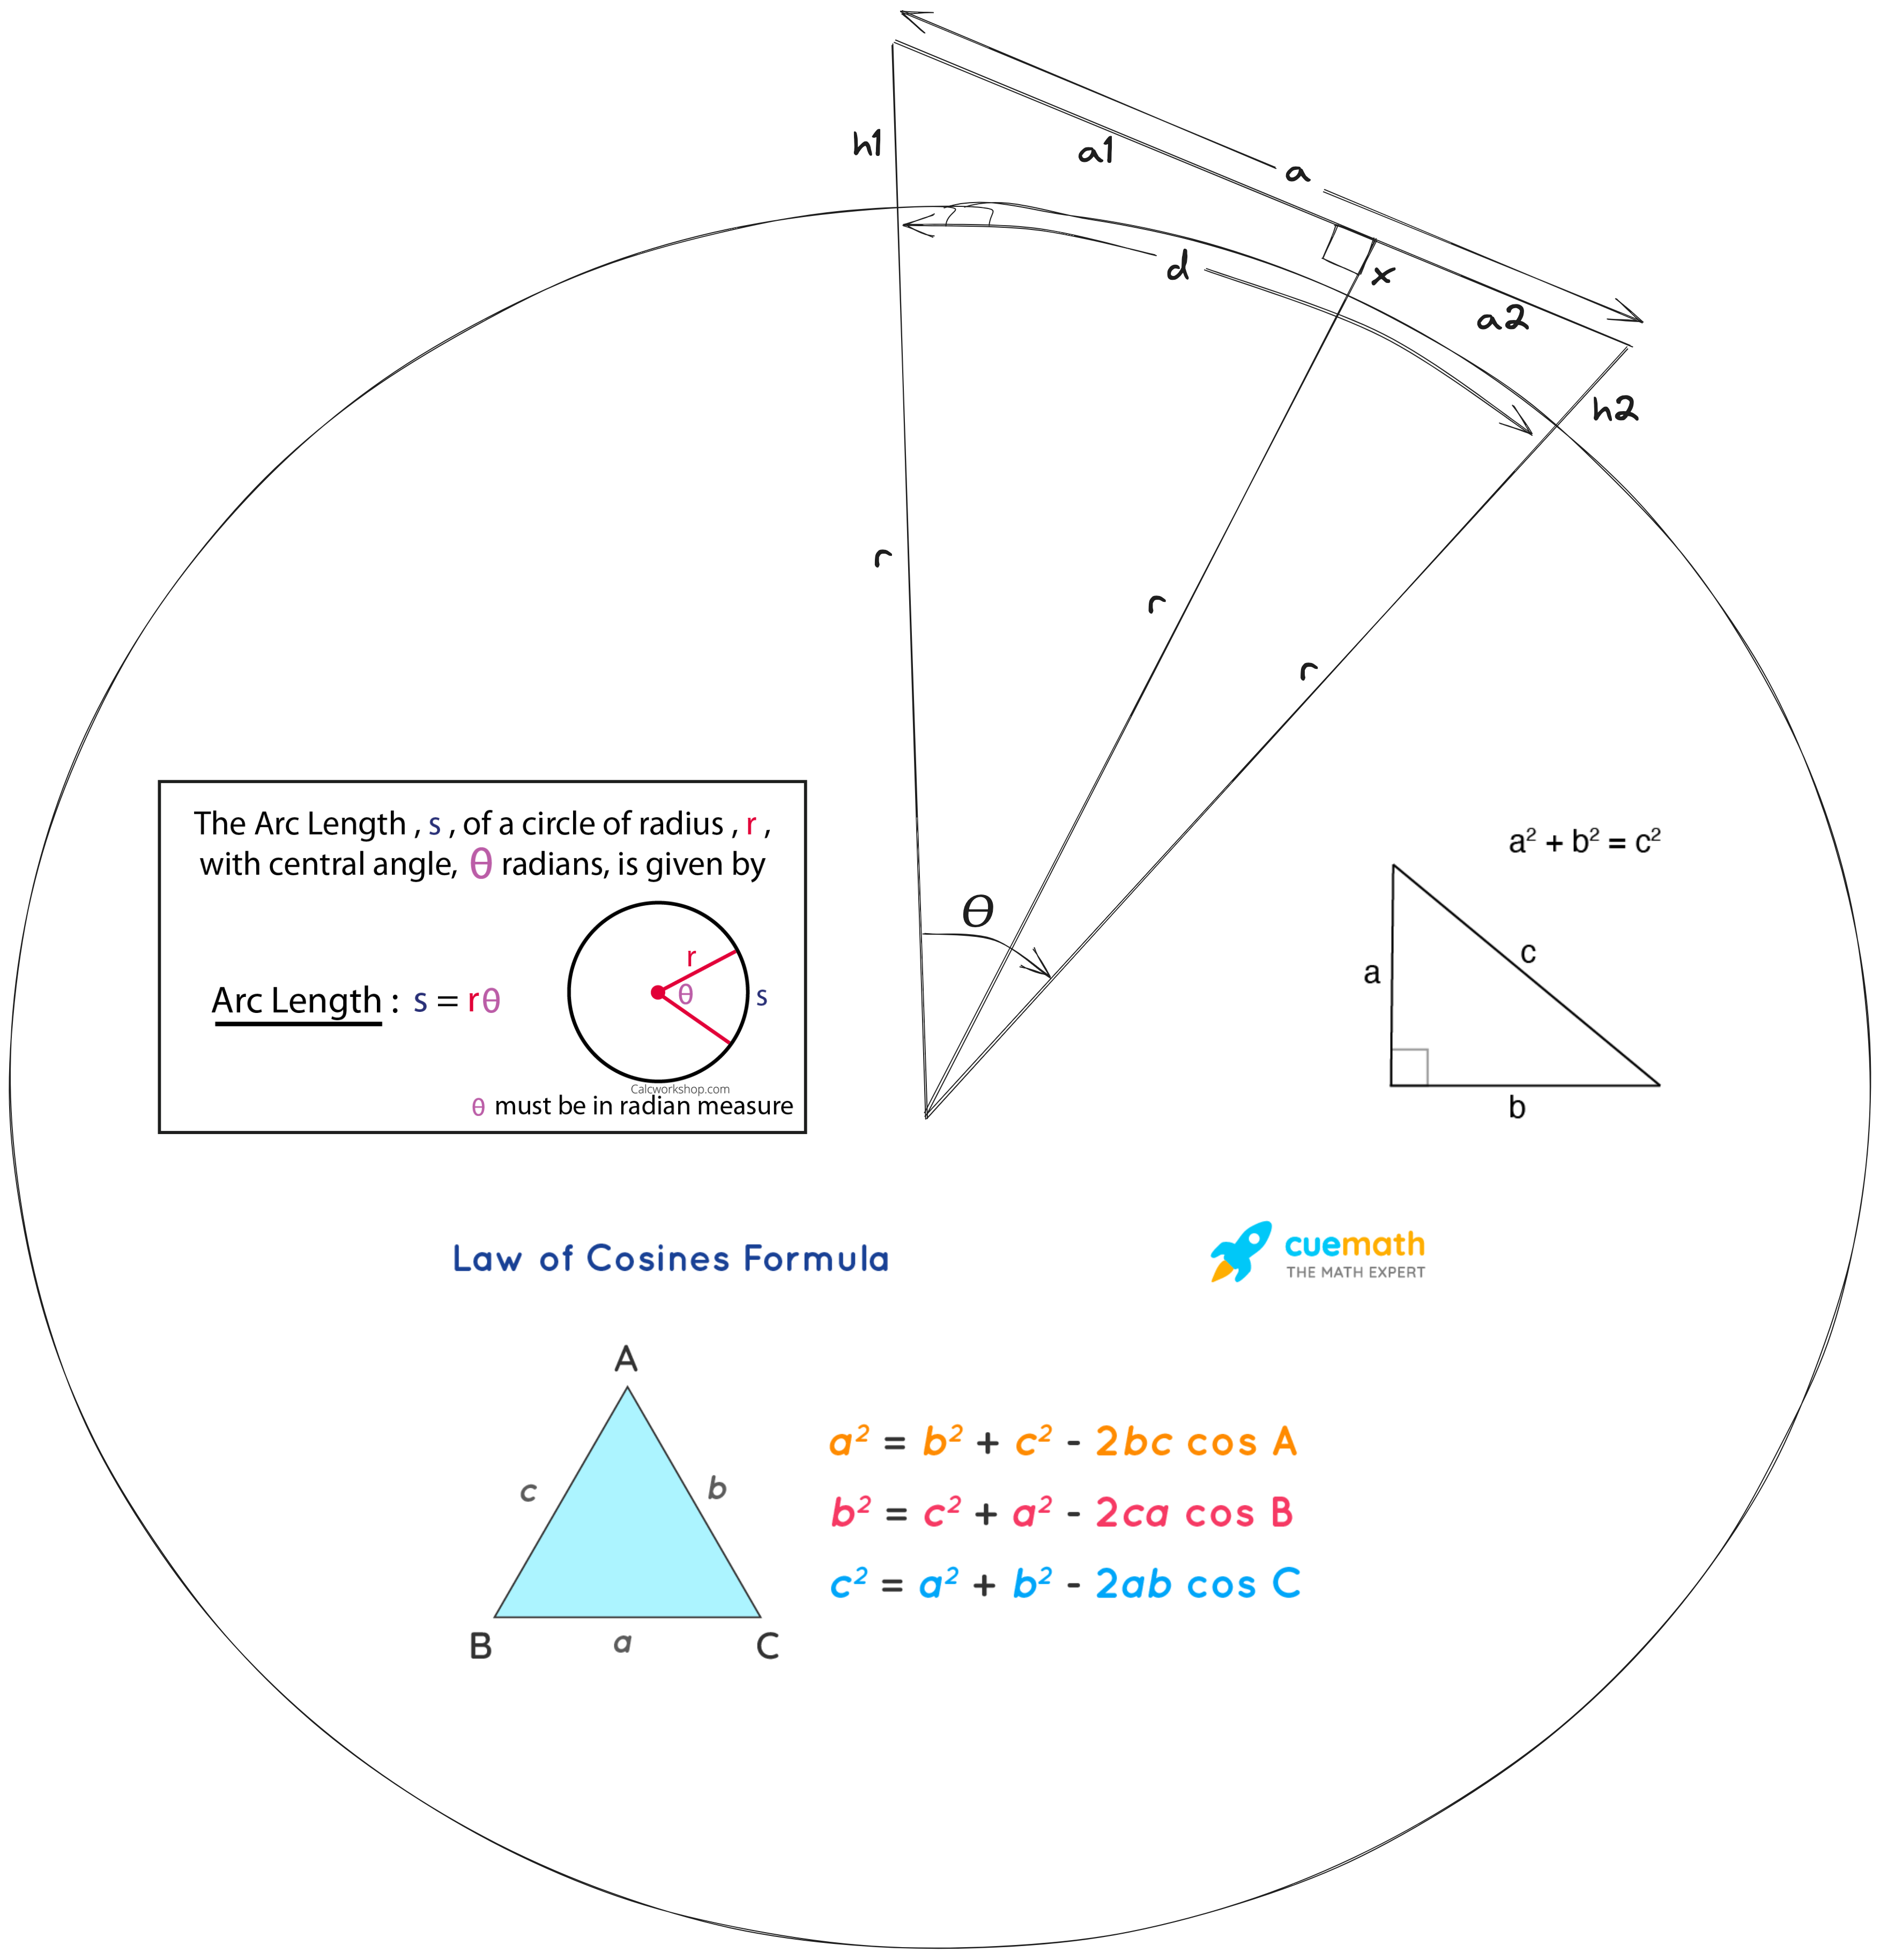

In [38]:
from IPython.display import Image, display
display(Image(filename='atl_skyline.png'))
display(Image(filename='no_spherical_madness.png'))

The model and equations are applied below for the specific case of observing the Atlanta skyline from the top of Blood Mountain in Georgia:

### Given
* Distance (arc) between observer (Blood Mountain) and target (BoA building in Atlanta): $d = 80$ miles.
* Elevation of the observer: $h_1 = 4000$ feet.
* Elevation of the target (Atlanta): $1000$ feet.
* Height of the target (BoA building): $1000$ feet.

### Assumptions
* The Earth is a perfect sphere with radius: $r = 6378$ kilometers.
* Percent height of BoA building that is visible: $95$%.

### Find
* The elevation of the line of sight between observer (on Blood Mountain) and target (BoA building in Atlanta) above the surface of the Earth (at radius, $r$): $x$.

In [39]:
# conversions
mi_to_km = 1.60934
mi_to_ft = 5280

def get_parameters():
    params = dict()

    # earth
    params['r_km'] = 6378

    # blood mountain   
    h1_ft = 4000
    params['h1_km'] = h1_ft / mi_to_ft * mi_to_km

    # atlanta
    frac_boa_visible = 0.95
    height_boa_ft = 1000
    el_atl_ft = 1000
    params['h2_km'] = (height_boa_ft * (1 - frac_boa_visible) + el_atl_ft) / mi_to_ft * mi_to_km # h2_km is the lowest point in kilometers of the building visible from blood mountain

    # distance
    d_mi = 80
    params['d_km'] = d_mi * mi_to_km

    return params


### Solution

To solve, we must reduce the system of equations in terms of our known variables ($d$, $h_1$, $h_2$, $a_2$, $r$) and our unknown variable ($x$). We begin by substituting equation (1) into equation (2) to define $a$:

$$
\begin{align}
a^2 = (r + h_1)^2 + (r + h_2)^2 - 2(r + h_1)(r + h_2)\cos(\frac{d}{r})
\end{align}
$$

Then, we define $a$ by substituting equations (3) and (4) into equation (5):

$$
\begin{align}
a = a_1 + a_2 \\
a^2 = (a_1 + a_2)^2 \\
a^2 = a_1^2 + a_2^2 + 2a_1a_2 \\
a_1^2 = (r + h_1)^2 - (r + x)^2  \\
a_2^2 = (r + h_2)^2 - (r + x)^2  \\
2a_1a_2 = 2\sqrt{(r + h_1)^2 - (r + x)^2}\sqrt{(r + h_2)^2 - (r + x)^2} \\
a^2 = (r + h_1)^2 + (r + h_2)^2 - 2(r + x)^2 + 2\sqrt{(r + h_1)^2 - (r + x)^2}\sqrt{(r + h_2)^2 - (r + x)^2}
\end{align}
$$

Next, we set our two definitions of $a$ equal to each other:

$$
\begin{align}
(r + h_1)^2 + (r + h_2)^2 - 2(r + x)^2 + 2\sqrt{(r + h_1)^2 - (r + x)^2}\sqrt{(r + h_2)^2 - (r + x)^2} &= (r + h_1)^2 + (r + h_2)^2 - 2(r + h_1)(r + h_2)\cos(\frac{d}{r}) \\
-(r + x)^2 + \sqrt{(r + h_1)^2 - (r + x)^2}\sqrt{(r + h_2)^2 - (r + x)^2} &= - (r + h_1)(r + h_2)\cos(\frac{d}{r}) \\
\end{align}
$$

Finally, we set the equation equal to zero and find the roots in terms of our only unknown, $x$:

$$
(r + h_1)(r + h_2)\cos(\frac{d}{r}) - (r + x)^2 + \sqrt{(r + h_1)^2 - (r + x)^2}\sqrt{(r + h_2)^2 - (r + x)^2} = 0 \\
$$


In [43]:
import numpy as np
from scipy.optimize import fsolve
sqrt = np.emath.sqrt
cos = np.cos

params = get_parameters()
r_km = params['r_km']
h1_km = params['h1_km']
h2_km = params['h2_km']
d_km = params['d_km']

# Equation to compute x in feet
def f(x_ft):
    x_km = x_ft / mi_to_ft * mi_to_km
    return (r_km + h1_km) * (r_km + h2_km) * cos(d_km / r_km) - (r_km + x_km)**2 + sqrt((r_km + h1_km)**2 - (r_km + x_km)**2) * sqrt((r_km + h2_km)**2 - (r_km + x_km)**2)

# Solve for x in feet
x_ft = fsolve(f, 900)
print("x = {} ft".format(x_ft[0]))

x = 948.7759158253515 ft


### Verification

We can use a different set of equations (substituting the Pythagorean equations with Heron's formula and the standard forumula for the area of a triangle) and a similar model (shown below) to verify the results above:

$$
\begin{align}
d = r\theta \\
b^2 = a^2 + c^2 - 2ac\cos(\theta) \\
A = \sqrt{s(s - a)(s - b)(s - c)} \\
s = \frac{a + b + c}{2} \\
A = \frac{1}{2}bh \\
a = r + h_1 \\
c = r + h_2 \\
h = r + x \\
\end{align}
$$

To solve for $x$, we factor the set of equations and solve for the roots like above:

$$
\begin{align}
A = \sqrt{s(s - a)(s - b)(s - c)} = \frac{1}{2}bh \\
h = \frac{2\sqrt{s(s - a)(s - b)(s - c)}}{b} \\
r + x = \frac{2\sqrt{s(s - a)(s - b)(s - c)}}{b} \\
b = \sqrt{a^2 + c^2 - 2ac\cos(\frac{d}{r})} \\
\end{align}
$$

We then solve for the roots of the following equation in terms of $x$:

$$
\begin{align}
\frac{2\sqrt{s(s - a)(s - b)(s - c)}}{b} - r - x = 0 \\
\end{align}
$$


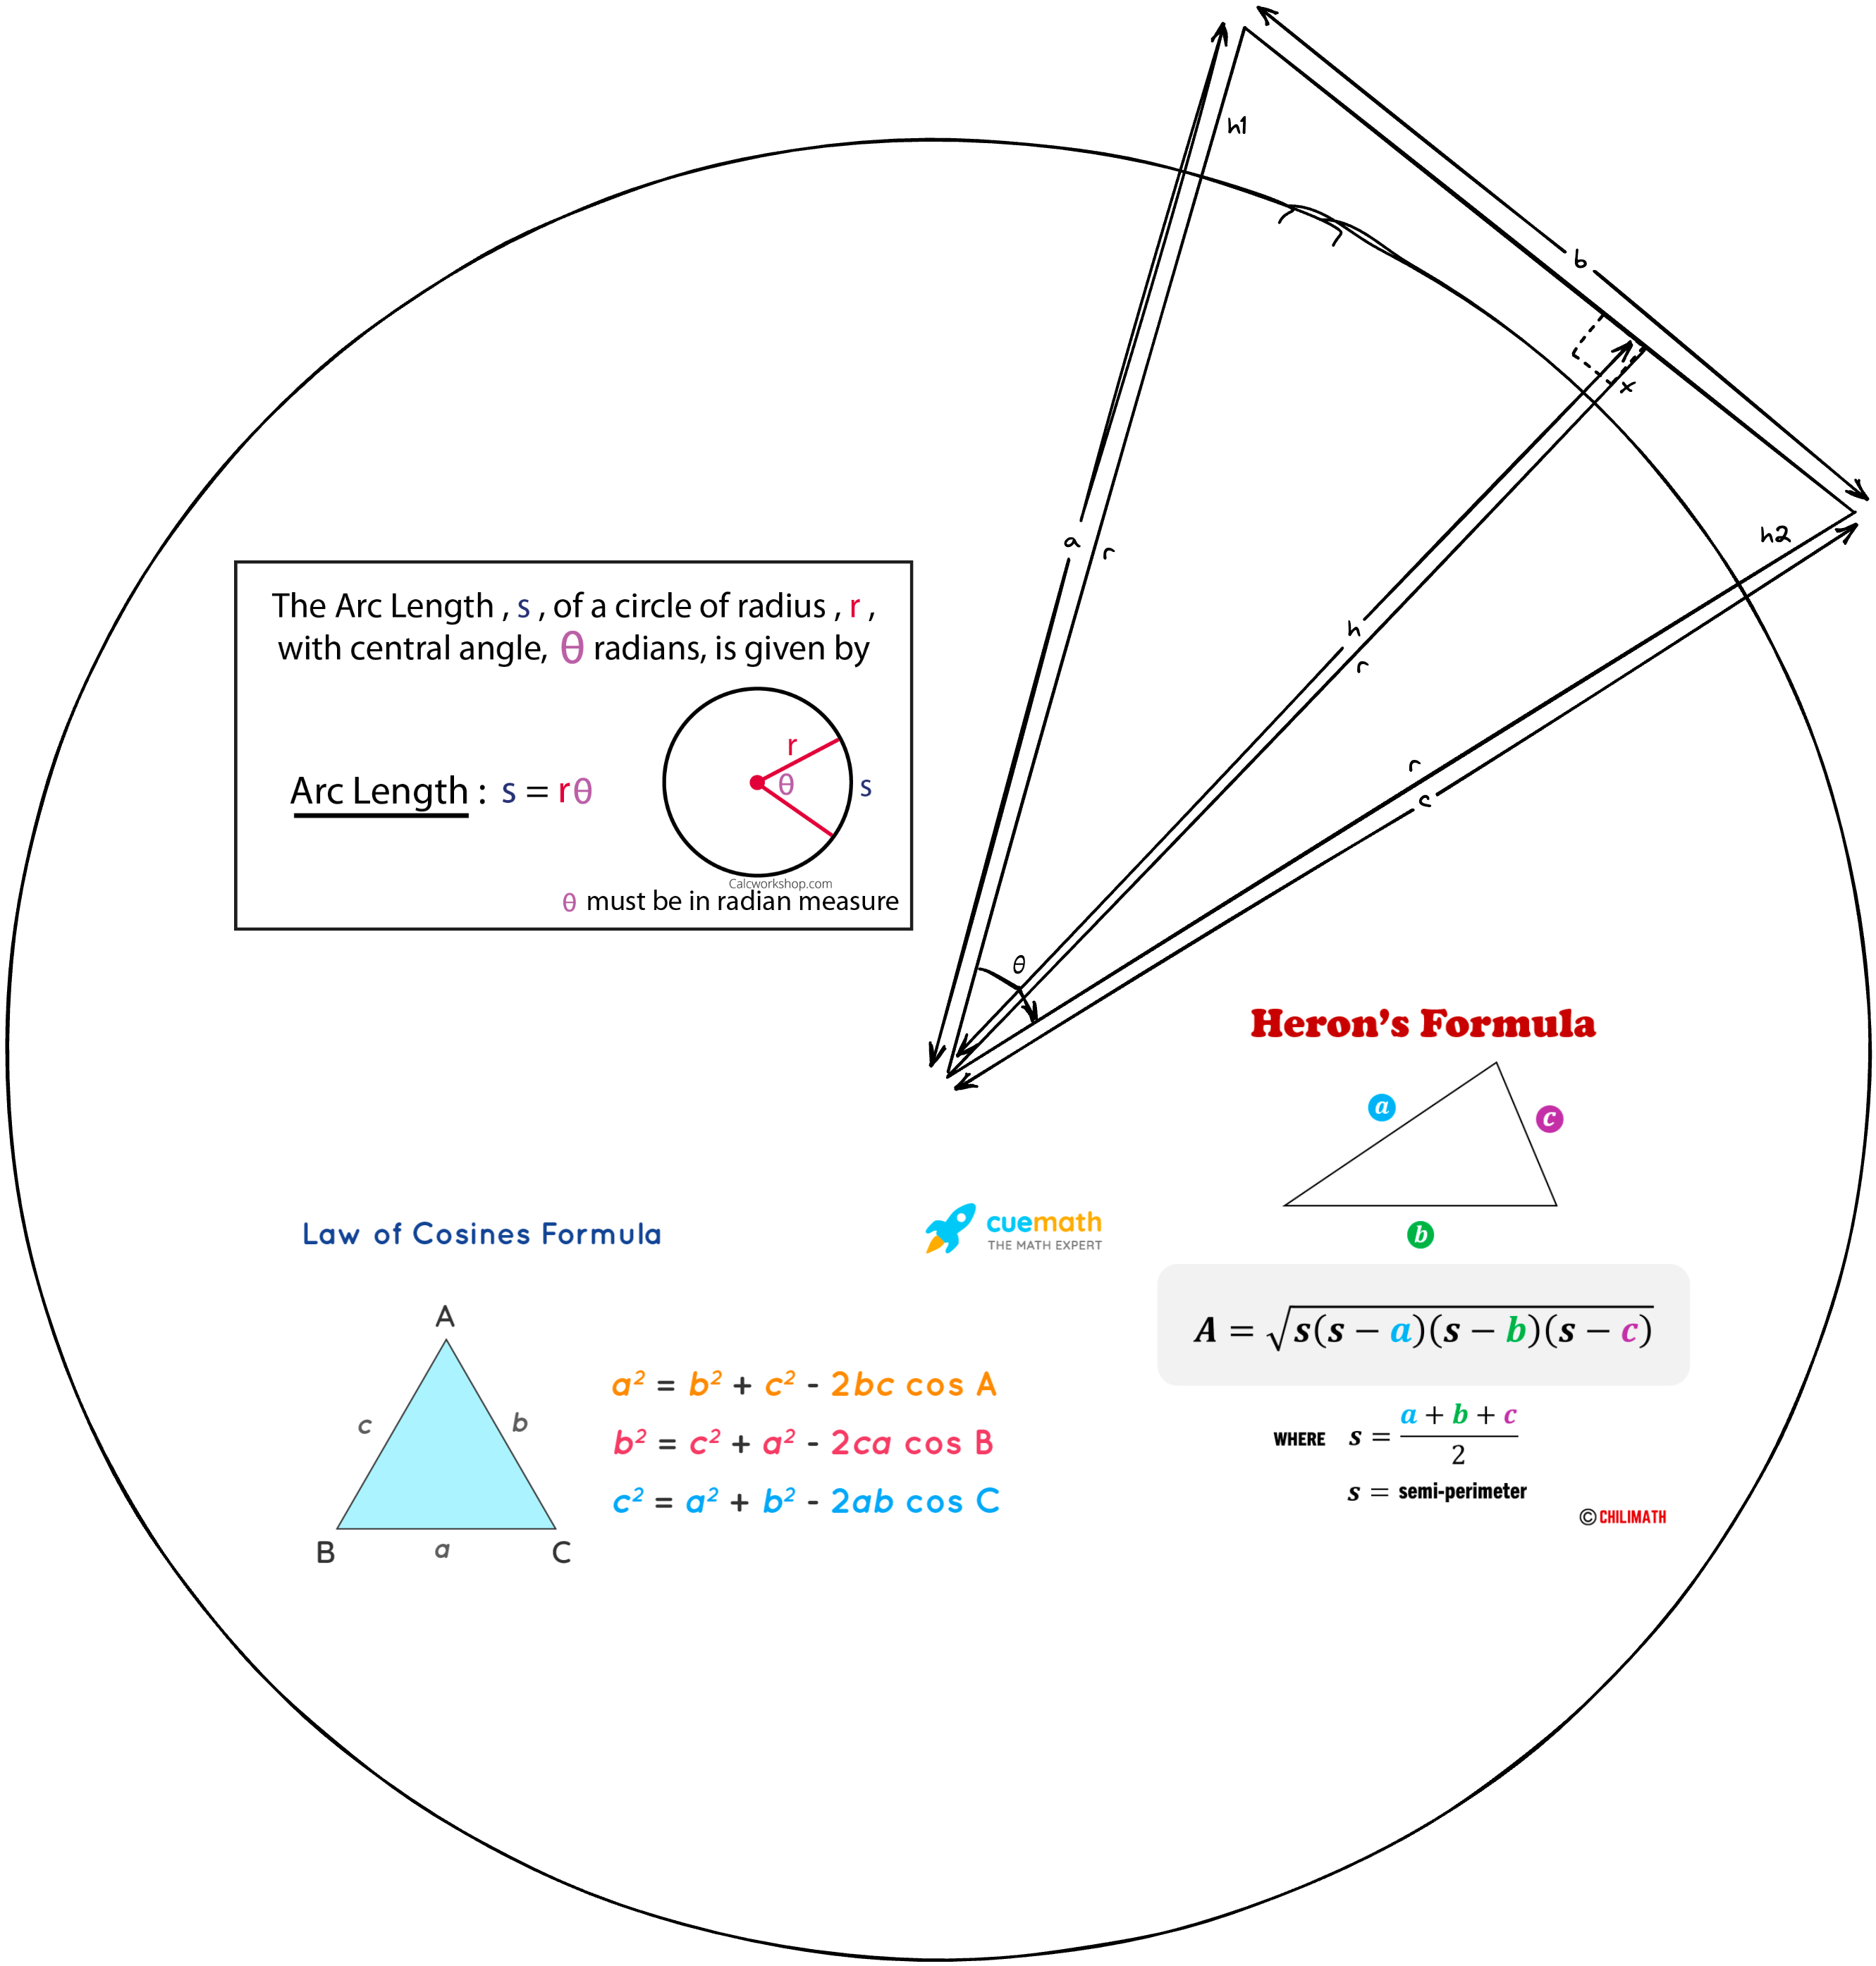

In [44]:
from IPython.display import Image, display
display(Image(filename='no_spherical_madness_2.png'))

In [45]:
import numpy as np
from scipy.optimize import fsolve
sqrt = np.emath.sqrt
cos = np.cos

params = get_parameters()
r_km = params['r_km']
h1_km = params['h1_km']
h2_km = params['h2_km']
d_km = params['d_km']

a_km = r_km + h1_km
c_km = r_km + h2_km
b_km = sqrt(a_km**2 + c_km**2 - 2 * a_km * c_km * cos(d_km / r_km))
s_km = (a_km + b_km + c_km) / 2

# Equation to compute x in feet
def f(x_ft):
    x_km = x_ft / mi_to_ft * mi_to_km
    return (2 / b_km) * sqrt(s_km * (s_km - a_km) * (s_km - b_km) * (s_km - c_km)) - r_km - x_km

# Solve for x in feet
x_ft = fsolve(f, 1000)
print("x = {} ft".format(x_ft[0]))

x = 948.7759158126161 ft


### Conclusion

Because the calculated minimum line of sight elevation (distance above Earth's radius) is 948.78 feet while the actual elevation between the two observations is ~1200 feet, Atlanta should not be visible from Blood Mountain on a spherical Earth with radius 6378 km.